In [2]:
import sys, os
from pathlib import Path
# from html.parser import HTMLParser
import textwrap
import random
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2
from datetime import datetime
from datetime import timedelta
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt
from IPython.display import display, HTML
display(HTML("<style>.container { width:98% !important; }</style>"))
# import umap
from tabulate import tabulate
from tqdm.notebook import tqdm
import yfinance as yf
import pandas as pd
# from scipy.optimize import linear_sum_assignment
from thefuzz import fuzz

from ipywidgets import widgets, Layout, HBox
from IPython.display import display, HTML
from collections import Counter

from sklearn.preprocessing import normalize
from sklearn import manifold
from matplotlib import pyplot as plt
from matplotlib.lines import Line2D
from matplotlib import patches as mpatches

import pandas as pd
import qgrid

import torch
from torch.nn import functional as F
from torch import optim
from torch import autograd
from src.optim import UnitShares, FeatureExtractor, GroupMatching, PortfolioMatching, FeatureVariance, MultiCriterion, ClipWeight, GroupScoring, ManualReqs
from scipy import optimize
from scipy.stats import linregress

from src import yahoo, optim, common

colors = dict(zip(common.base_sectors, common.mpl_colors))
colors['Industrials'] = '#777777'
colors['Utilities'] = '#a6a119'
colors['Energy'] = '#c5a96e'

# from ew_etfs import INDEX, ETF, CACHE

C:\Users\anwan\anaconda3\lib\site-packages\thefuzz\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [3]:
etfnames = ['PGAL', 'EWP', 'EWQ', 'EWK', 'EWO', 'EWN', 'EWI', 'EWG']
tknames = ['1COV.DE', 'A2A.MI', 'AALB.AS', 'ABI.BR', 'ABN.AS', 'AC.PA', 'ACA.PA', 'ACKB.BR', 'ACS.MC', 'ACX.MC', 'AD.AS', 'ADP.PA', 'ADS.DE', 'ADYEN.AS', 'AED.BR', 'AEGN.AT', 'AFX.DE', 'AGFB.BR', 'AGN.AS', 'AGR.VI', 'AGS.BR', 'AI.PA', 'AIR.PA', 'AKE.PA', 'AKZA.AS', 'ALFEN.AS', 'ALO.PA', 'ALPHA.AT', 'ALTR.LS', 'ALV.DE', 'AM.PA', 'AMG.AS', 'AMP.MI', 'AMS.MC', 'AMUN.PA', 'ANA.MC', 'ANDR.VI', 'APAM.AS', 'ARCAD.AS', 'ARGX.BR', 'ASM.AS', 'ASML.AS', 'ASRNL.AS', 'AT1.DE', 'ATS.VI', 'AZM.MI', 'BAMI.MI', 'BAMNB.AS', 'BAR.BR', 'BAS.DE', 'BAYN.DE', 'BBVA.MC', 'BC8.DE', 'BCP.LS', 'BEFB.BR', 'BEI.DE', 'BEKB.BR', 'BESI.AS', 'BFIT.AS', 'BG.VI', 'BGN.MI', 'BIM.PA', 'BIRG.IR', 'BKT.MC', 'BMW.DE', 'BMW3.DE', 'BN.PA', 'BNP.PA', 'BNR.DE', 'BOL.PA', 'BPE.MI', 'BPOST.BR', 'BRNL.AS', 'BSGR.AS', 'BVI.PA', 'BZU.MI', 'CA.PA', 'CABK.MC', 'CAI.VI', 'CAP.PA', 'CBK.DE', 'CCEP.AS', 'CFEB.BR', 'CGCBV.HE', 'CLNX.MC', 'CMCOM.AS', 'CNHI.MI', 'COFB.BR', 'COL.MC', 'COLR.BR', 'CON.DE', 'COR.LS', 'COV.PA', 'CPR.MI', 'CRBN.AS', 'CS.PA', 'CTT.LS', 'DB1.DE', 'DBK.DE', 'DG.PA', 'DHER.DE', 'DIA.MI', 'DIE.BR', 'DIM.PA', 'DOC.VI', 'DPW.DE', 'DSM.AS', 'DSY.PA', 'DTE.DE', 'DTG.DE', 'EBS.VI', 'ECMPA.AS', 'ECONB.BR', 'EDEN.PA', 'EDF.PA', 'EDP.LS', 'EDPR.LS', 'EGL.LS', 'EL.PA', 'ELI.BR', 'ELISA.HE', 'EN.PA', 'ENEL.MI', 'ENG.MC', 'ENGI.PA', 'ENI.MI', 'ENR.DE', 'ENX.PA', 'EO.PA', 'EOAN.DE', 'ERF.PA', 'ETE.AT', 'EURN.BR', 'EUROB.AT', 'EVK.DE', 'EVN.VI', 'EXAE.AT', 'FACC.VI', 'FAGR.BR', 'FAST.AS', 'FBK.MI', 'FDJ.PA', 'FER.MC', 'FFARM.AS', 'FGR.PA', 'FIA1S.HE', 'FLOW.AS', 'FME.DE', 'FORTUM.HE', 'FPE3.DE', 'FR.PA', 'FRE.DE', 'FRIGO.AT', 'FUR.AS', 'G.MI', 'G1A.DE', 'G24.DE', 'GALP.LS', 'GBLB.BR', 'GET.PA', 'GFC.PA', 'GIMB.BR', 'GLE.PA', 'GLPG.AS', 'GRF.MC', 'GVOLT.LS', 'HEI.DE', 'HEIA.AS', 'HEIO.AS', 'HEN.DE', 'HEN3.DE', 'HER.MI', 'HFG.DE', 'HNR1.DE', 'HO.PA', 'IAG.MC', 'IBAB.BR', 'IBE.MC', 'IBS.LS', 'IDR.MC', 'IFX.DE', 'IG.MI', 'IIA.VI', 'IMCD.AS', 'IMMO.BR', 'INGA.AS', 'INPST.AS', 'INTER.AS', 'INTO.BR', 'INW.MI', 'IPN.PA', 'ISP.MI', 'ITX.MC', 'IVG.MI', 'JDEP.AS', 'JMT.LS', 'JUVE.MI', 'KBC.BR', 'KBCA.BR', 'KBX.DE', 'KEMIRA.HE', 'KER.PA', 'KGX.DE', 'KIN.BR', 'KNEBV.HE', 'KPN.AS', 'LAMDA.AT', 'LDO.MI', 'LEG.DE', 'LHA.DE', 'LI.PA', 'LIGHT.AS', 'LIN.DE', 'LNZ.VI', 'LR.PA', 'LXS.DE', 'MAP.MC', 'MB.MI', 'MBG.DE', 'MC.PA', 'MEL.MC', 'MELE.BR', 'MF.PA', 'MITRA.BR', 'ML.PA', 'MMK.VI', 'MONC.MI', 'MONT.BR', 'MRK.DE', 'MRL.MC', 'MT.AS', 'MTS.MC', 'MTX.DE', 'MUV2.DE', 'MYTIL.AT', 'NBA.LS', 'NEM.DE', 'NESN.SW', 'NEXI.MI', 'NN.AS', 'NOKIA.HE', 'NOS.LS', 'NSI.AS', 'NTGY.MC', 'NVG.LS', 'O2D.DE', 'OBEL.BR', 'OCI.AS', 'OMV.VI', 'ONTEX.BR', 'OR.PA', 'ORA.PA', 'ORP.PA', 'OUT1V.HE', 'PAH3.DE', 'PAL.VI', 'PHARM.AS', 'PHIA.AS', 'PHM.MC', 'PHR.LS', 'PIRC.MI', 'PNL.AS', 'POS.VI', 'POST.VI', 'PPC.AT', 'PROX.BR', 'PRX.AS', 'PRY.MI', 'PST.MI', 'PUB.PA', 'PUM.DE', 'RAA.DE', 'RACE.MI', 'RAM.LS', 'RAND.AS', 'RBI.VI', 'RCO.PA', 'REC.BR', 'REC.MI', 'RED.MC', 'REN.AS', 'RENE.LS', 'REP.MC', 'RET.BR', 'RF.PA', 'RI.PA', 'RMS.PA', 'RNO.PA', 'RWE.DE', 'RYA.IR', 'SAB.MC', 'SAF.PA', 'SAN.MC', 'SAN.PA', 'SAP.DE', 'SBMO.AS', 'SBO.VI', 'SEM.LS', 'SEM.VI', 'SFER.MI', 'SGO.PA', 'SGRE.MC', 'SHELL.AS', 'SHL.DE', 'SHUR.BR', 'SIE.DE', 'SIFG.AS', 'SK.PA', 'SLIGR.AS', 'SLR.MC', 'SNC.LS', 'SOF.BR', 'SOLB.BR', 'SON.LS', 'SPI.VI', 'SPM.MI', 'SRG.MI', 'SRT3.DE', 'SRV1V.HE', 'STERV.HE', 'STLA.MI', 'STM.MI', 'STM.PA', 'SU.PA', 'SW.PA', 'SY1.DE', 'TEF.MC', 'TELIA1.HE', 'TEN.MI', 'TEP.PA', 'TESB.BR', 'TIT.MI', 'TKA.VI', 'TKWY.AS', 'TNET.BR', 'TOM2.AS', 'TPEIR.AT', 'TRN.MI', 'TTE.PA', 'TWEKA.AS', 'UBI.PA', 'UCB.BR', 'UCG.MI', 'UMG.AS', 'UMI.BR', 'UN01.DE', 'UNA.AS', 'UNI.MI', 'UPM.HE', 'UQA.VI', 'URW.AS', 'UTDI.DE', 'VALMT.HE', 'VAN.BR', 'VASTN.AS', 'VER.VI', 'VGP.BR', 'VIE.PA', 'VIG.VI', 'VIV.PA', 'VLK.AS', 'VNA.DE', 'VOE.VI', 'VOW.DE', 'VOW3.DE', 'VPK.AS', 'WDP.BR', 'WHA.AS', 'WIE.VI', 'WKL.AS', 'WLN.PA', 'WRT1V.HE', 'XIOR.BR', 'ZAG.VI', 'ZAL.DE']

bad = {'AM1S.HE', 'NAV.LS', 'REE.MC', 'SEV.PA', 'HTOO.LS', 'FOLLI.AT', 'TUI.AT', 'ATL.MI', 'KESKO.HE', 'HELS.HE', 'ORION.HE', 'ALT.LS', 'AENA.MC', 'EXO.MI', 'EFACEC.LS', 'ELLAK.AT', 'METSO.HE', 'FISKARS.HE', 'BOKA.AS', 'MOTOR.AT', 'DAI.DE', 'RBI.HE', 'ACCEL.AS', 'OTE1V.HE', 'SONI.LS', 'XTSLA.PA', 'FID.LS', 'NRE1V.HE', 'VGR.LS', 'NDA.FI', 'SONC.LS', 'ACC.LS', 'TRQ.LS', 'AER.AS', 'VIOH.AT', 'ELE.MC', 'QGEN.DE', 'EYATH.AT', 'TERNA.AT', 'CNP.PA', 'URW.PA', 'NB.LS', 'XTSLA.MC', 'PT.LS', 'JUMBO.AT', 'OTE.AT', 'HELPE.AT'}
tknames = [t for t in tknames if t not in bad]
tknames = sorted(set(tknames))

# date = 'last'
# date = '220208'
# date = '220316'
# date = '220420'
date = '221221'
# date = None

full = [yahoo.download(t, date=date, pbar=None, allow_download=True, skip_failures=True) 
        for t in tqdm(tknames, desc='Tickers')]
full = [f for f in full if f is not None]
fulltks = {t.ticker:t for t in full}
find = common.make_find(full)
etfs = [yahoo.load_portfolio(name) for name in tqdm(etfnames, desc='ETFs')]
etftks = {name: etf for name, etf in zip(etfnames,etfs)}
len(full)

Tickers:   0%|          | 0/375 [00:00<?, ?it/s]

ETFs:   0%|          | 0/8 [00:00<?, ?it/s]

375

In [4]:
options = full.copy()


In [5]:
tk = random.choice(options)
# tk = options[7]
tk.ticker

'SU.PA'

In [6]:
def optimize_portfolio(tks, sectors=None, countries=None, reqs=None, sector_wt=1., country_wt=1., req_wt=1000., unit_wt=1., capital=100000, clip_lim=0.1, clip_wt=100):
    crs = []
    unit_cr = UnitShares(capital, p=2, wt=unit_wt)
    crs.append(unit_cr)
    clip_cr = ClipWeight(clip_lim, p=2, wt=clip_wt)
    crs.append(clip_cr)
    if reqs is not None:
        req_cr = ManualReqs(reqs, wt=req_wt)
        crs.append(req_cr)
    if sectors is not None:
        sec_cr = GroupMatching(sectors, common.make_info_key('sector'), aliases=common.sector_aliases, as_logits=False, wt=sector_wt,)
        crs.append(sec_cr)
    if countries is not None:
        nat_cr = GroupMatching(countries, common.make_info_key('country'), wt=country_wt, as_logits=False)
        crs.append(nat_cr)
    cr = MultiCriterion(crs)
    cr.prepare(tks)
    
    q = torch.randn(len(tks)) * 0.
    x = q.detach().numpy()
    lasso = 0.
    # lasso = 2.
    def _loss(q, lmbda=None):
        if lmbda is None:
            lmbda = lasso
        else:
            lmbda = 0.
        w = q + lmbda * torch.randn_like(q)
        w = F.softmax(w,0)
        return cr(w).mul(-1)
    def _forward(q, loss_fn=None):
        if loss_fn is None:
            loss_fn = _loss
        q = torch.from_numpy(q).float()
        return loss_fn(q).detach().numpy()
    def _grad(q, loss_fn=None):
        if loss_fn is None:
            loss_fn = _loss
        q = torch.from_numpy(q).float()
        q.requires_grad = True
        loss = loss_fn(q)
        return autograd.grad(loss, q)[0].detach().numpy()

    out = optimize.minimize(_forward, 
                            x0=x,
                        jac=_grad,
                      method='BFGS',
    #                   method='CG',
                     )
    x = out.x
#     print(out.fun, out.nit, out.success)

    best = torch.from_numpy(x).float()
    init = F.softmax(q,0).detach()
    best = F.softmax(best,0)
    price = unit_cr.capital / unit_cr.param
    count = unit_cr.param * best
    count = count.int()
    cost = price * count
    total = cost.sum().item()
    return best, x, cr, count, cost, total

def group_tables(vals, key='country'):
    total = sum(vals.values())
    sp = Counter()
    for tk, c in vals.items():
        sp[tk.info.get(key, 'None')] += c/total*100
    # sum(sp.values())
    return sorted(sp.items(), key=lambda x: (x[1],x[0]), reverse=True)

flag_emojis = {'Switzerland': '🇨🇭', 'Austria': '🇦🇹','Spain': '🇪🇸','Italy': '🇮🇹','Belgium': '🇧🇪','Netherlands': '🇳🇱','Germany': '🇩🇪','Portugal': '🇵🇹','France': '🇫🇷', 'United Kingdom': '🇬🇧',
               'Greece': '🇬🇷', 'Ireland': '🇮🇪', 'Finland': '🇫🇮', 'Luxembourg': '🇱🇺', 'Sweden': '🇸🇪'}
sector_emojis = {
    'Consumer Staples': '🛒',# '🍎',
    'Financials': '💰', # '💵', #'🪙',
    'Utilities': '💧', #'🛁', # '🚿', # '🚰',
    'Technology': '📱', #'💻',
    'Energy': '🔥', #'🛢', # '⚡️'
    'Consumer Discretionary': '🎁', # '🛍'
    'Communication Services': '📞', # '📡', 
    'Industrials': '⚙️',# '🔧', #'🏭',
    'Healthcare': '💊', #'💉',
    'Materials': '🌲', #'🧱', # '📦',
    'Real Estate': '🏠',
#     '?': '❓',
}
sector_emojis.update({key: sector_emojis.get(alias) for key, alias in common.sector_aliases.items()})

existing = None

In [8]:
# copy from interactive brokers portfolio view (condensed)

current_raw = '''MC 	1	C693.8	—	611.00	
695.70
611.25	+1.90	+84.50		
ASML 	1	C540.5	—	533.00	
542.10
532.65	+1.90	+9.75		
MRK 	3	C181.20	—	525.00	
543.45
174.87	+3.15	+22.20		
ITX 	26	C24.32	—	523.00	
633.62
20.10	0.00	+110.00		
PRX 	11	C63.80	—	500.00	
701.03
45.46	-1.21	+200.00		
AMS 	8	C50.50	—	480.00	
404.48
60.05	0.00	-76.40		
AI 	3	C132.76	—	449.00	
399.42
149.65	+1.50	-49.20		
ALV 	2	C197.86	—	432.00	
396.12
216.18	+1.64	-35.00		
AIR 	4	C109.98	—	421.00	
441.28
105.19	+1.36	+20.50		
SU 	3	C130.82	—	404.00	
393.42
134.70	+0.84	-10.80		
BAYN 	6	C48.560	—	364.00	
292.77
60.68	+1.83	-70.90		
WDP 	9	C26.40	—	334.00	
237.78
37.12	+0.18	-96.30		
SAN 	3	C87.62	—	300.00	
265.77
100.07	+2.64	-34.70		
SAP 	3	C99.45	—	293.00	
297.90
97.51	-0.69	+5.12		
VNA 	8	C21.50	—	289.00	
173.20
36.14	+0.96	-116.00		
NEXI 	30	C7.360	—	286.00	
220.82
9.53	0.00	-65.20		
JMT 	14	20.08	-2.14%	283.00	
281.12
20.25	-6.16	-2.36		
EBS 	9	C28.29	—	271.00	
255.15
30.09	0.00	-16.20		
ENI 	20	C12.900	—	269.00	
260.56
13.47	+0.64	-10.80		
NESN 	2	C107.16	—	256.00	
214.32
127.88	0.00	-41.40		
BNP 	5	C52.54	—	246.00	
263.45
49.20	+0.75	+17.40		
SIE 	2	C127.08	—	233.00	
253.04
116.61	-0.76	+20.20		
IBE 	20	C10.715	—	224.00	
215.10
11.21	+2.80	-7.00		
VER 	2	C79.75	—	205.00	
159.40
102.70	0.00	-45.90		
ENEL 	31	C5.050	—	195.00	
155.59
6.30	0.00	-38.70		
RBI 	17	C14.61	—	184.00	
248.54
10.84	0.00	+64.00		
ABI 	3	C55.99	—	165.00	
168.84
54.92	+0.87	+4.09		
PROX 	9	C8.492	—	155.00	
76.73
17.20	+0.41	-78.00		
SHL 	3	C48.10	—	154.00	
143.94
51.22	-0.36	-9.71		
TTE 	3	C55.66	—	142.00	
167.85
47.23	+0.81	+26.10		
PHIA 	5	C12.846	—	126.00	
64.32
25.13	+0.05	-61.30		
DTE 	7	C18.850	—	122.00	
132.66
17.38	+0.91	+11.20		
IIA 	5	C11.85	—	118.00	
59.55
23.58	-0.95	-59.60		
CA 	5	C15.575	—	104.00	
77.93
20.84	0.00	-26.30		
CS 	4	C26.030	—	102.00	
104.94
25.48	+0.72	+2.91		
ISP 	50	C2.0580	—	100.00	
102.87
1.99	+0.38	+3.65		
OMV 	2	C46.00	—	99.00	
92.46
49.70	0.00	-7.41		
BAS 	2	C45.790	—	97.00	
91.97
48.53	+0.47	-5.01		
UBI 	2	C25.48	—	87.00	
51.04
43.48	+0.02	-36.00		
ZAL 	2	C31.85	—	76.00	
63.70
37.91	-0.12	-12.20		
TKA 	10	C5.564	—	74.00	
56.00
7.38	+0.42	-17.70		
INGA 	7	C11.268	—	64.00	
78.72
9.17	-0.24	+14.50		
BBVA 	12	C5.398	—	62.00	
64.73
5.16	0.00	+2.90		
HEN 	1	C61.10	—	61.00	
61.07
61.35	0.00	-0.25		
AD 	2	C27.150	—	58.00	
54.43
28.85	+0.15	-3.25		
EDF 	6	C12.000	—	53.00	
71.97
8.79	-0.24	+19.00		
EOAN 	5	C8.928	—	51.00	
44.83
10.24	+0.37	-6.18		
TEF 	10	C3.246	—	50.00	
32.62
4.97	0.00	-17.20		
ORA 	4	C9.180	—	47.00	
36.93
11.69	+0.16	-9.87		
SAN1 	15	C2.7235	—	45.00	
40.83
2.98	-0.07	-3.84		
REP 	2	C13.990	—	31.00	
28.13
15.59	+0.39	-2.80		
VIV 	1	C8.670	—	12.00	
8.68
12.21	0.00	-3.54'''
existing = {}
for line in current_raw.split('\n'):
    if '\t' in line and line[0] not in '0123456789':
        name, q, *_ = line.split('\t')
        for n in '0123456789':
            name = name.replace(n,'')
        existing[find(name.strip())] = int(q)
ex_val = {tk: n*tk.info.get('currentPrice') for tk, n in existing.items()}

print(tabulate(group_tables(ex_val, key='country')))
print(tabulate(group_tables(ex_val, key='sector')))

len(existing)

51

In [7]:
tk_picks = {'ENEL.MI', 'TEN.MI', 'CS.PA', 'SAN.MC', 'ISP.MI', 'UCB.BR', 'ASML.AS', 'NESN.SW', 'BIRG.IR', 'TKA.VI', 'FORTUM.HE', 'SON.LS', 'IBE.MC', 'IAG.MC', 'UPM.HE', 'VER.VI', 'SAN.PA', 'ETE.AT', 'ZAL.DE', 'ATS.VI', 'NOS.LS', 'BN.PA', 'SU.PA', 'MRL.MC', 'REN.AS', 'EDF.PA', 'NOKIA.HE', 'UBI.PA', 'KER.PA', 'KBC.BR', 'BBVA.MC', 'PHIA.AS', 'TEF.MC', 'AI.PA', 'EOAN.DE', 'BNP.PA', 'EVN.VI', 'CA.PA', 'PPC.AT', 'UMG.AS', 'JMT.LS', 'IFX.DE', 'VNA.DE', 'RBI.VI', 'MRK.DE', 'BAS.DE', 'HO.PA', 'SHELL.AS', 'WDP.BR', 'UNA.AS', 'ITX.MC', 'NEXI.MI', 'DTE.DE', 'PROX.BR', 'LHA.DE', 'REP.MC', 'ABI.BR', 'BAYN.DE', 'GALP.LS', 'MC.PA', 'ARGX.BR', 'EDP.LS', 'SHL.DE', 'AIR.PA', 'BMW.DE', 'DTG.DE', 'ENI.MI', 'ORA.PA', 'SAP.DE', 'AD.AS', 'RYA.IR', 'INGA.AS', 'STM.MI', 'CNHI.MI', 'PRX.AS', 'AMP.MI', 'LIN.DE', 'HEN.DE', 'VIV.PA', 'SIE.DE', 'IIA.VI', 'AMS.MC', 'EBS.VI', 'ALV.DE', 'RACE.MI', 'TTE.PA'}
tk_picks.update({'ITX.MC', 'SU.PA', 'VIV.PA', 'MRK.DE', 'AI.PA', 'EBS.VI', 'ASML.AS', 'AMS.MC', 
            'KER.PA', 'ADS.DE', 'JMT.LS', 'EOAN.DE', 'SAP.DE', 'ENI.MI', 'VNA.DE', 'WDP.BR', 
            'DTE.DE', 'MC.PA', 'TEF.MC', 'AIR.PA', 'ABI.BR', 'NEXI.MI', 'OMV.VI', 'PHIA.AS', 
            'ENEL.MI', 'BBVA.MC', 'CS.PA', 'IIA.VI', 'REP.MC', 'TTE.PA', 'SIE.DE', 'ORA.PA', 
            'SHL.DE', 'ALV.DE', 'BNP.PA', 'HEN.DE', 'AD.AS', 'PRX.AS', 'UBI.PA', 'IBE.MC', 
            'VER.VI', 'NESN.SW', 'TKA.VI', 'INGA.AS', 'LHA.DE', 'BAYN.DE', 'ISP.MI', 'SAN.MC', 
            'EDF.PA', 'SAN.PA', 'BAS.DE', 'PROX.BR', 'CA.PA', 'RBI.VI', 'ZAL.DE',
            
            'RACE.MI', 
            'OR.PA',
            'SU',
            'IBE',
           
           })

vocab = {find(n) for n in tk_picks}
if existing is not None:
    vocab.update(existing.keys())
vocab = np.array(list(vocab))
len(vocab)

89

In [8]:
capital = 12000


sectors = {
    'Technology': 13.0,
    'Healthcare': 13.0,
    'Financials': 14.0,
    'Consumer Discretionary': 12.0,
    'Communication Services': 8.0,
    'Industrials': 10.0,
    'Consumer Staples': 5.0,
    'Materials': 6.0,
    'Utilities': 7.0,
    'Energy': 2.0,
    'Real Estate': 6.0,
}
countries = {    
 'Germany': 20.0,
 'France': 18.0,
 'Netherlands': 13.0,
    
 'Italy': 10.0,
 'Belgium': 5.0,
 'Austria': 8.0,
    
 'Portugal': 2.0,
 'Spain': 9.0,
    
 'Luxembourg': 1.0,
 'United Kingdom': 5.0,
 'Switzerland': 2.0,
}
xwts = np.logspace(-9,-4,15)

In [9]:
nums = {
    
}
if existing is not None:
    nums = {tk.ticker: n for tk, n in existing.items()}

nums = {find(t):n+1 for t,n in nums.items()}

In [10]:
tots = []
outs = []
for uwt in tqdm(xwts):
    out = optimize_portfolio(vocab, sectors=sectors, countries=countries, 
                             reqs={tk:n*tk.info.get('currentPrice')/capital for tk, n in nums.items()}, 
                             sector_wt=1., country_wt=1., unit_wt=uwt, capital=capital, clip_lim=0.05 )
    tots.append(out[-1])
    outs.append(out)
tots = np.array(tots)
len(xwts), len(tots)

  0%|          | 0/15 [00:00<?, ?it/s]

(15, 15)

<IPython.core.display.Javascript object>


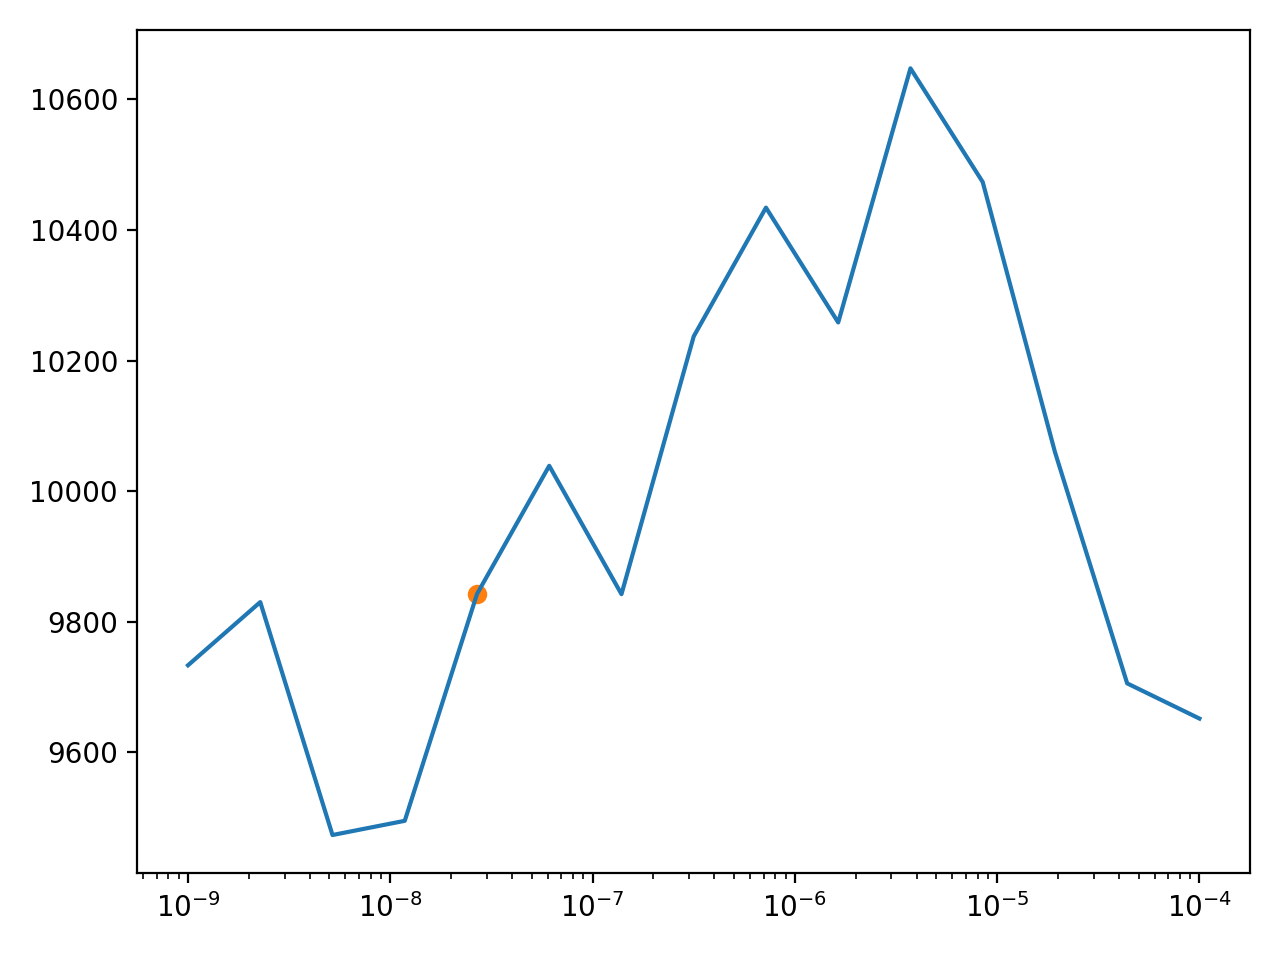

(9842.1572265625, 2.682695795279727e-08)

In [11]:
plt.figure()
plt.plot(xwts, tots);
plt.xscale('log');
plt.tight_layout();

pick = np.argmax(tots).item()
pick = 4

u = xwts[pick]
prices = torch.as_tensor([tk.info.get('currentPrice') for tk in vocab])
indices = {tk.ticker:i for i, tk in enumerate(vocab)}
best, x, cr, opt_count, cost, total = outs[pick]
plt.scatter([u], [total], c='C1')
total, u


In [14]:
forced = {}
count = opt_count.clone()
for tk,n in forced.items():
    tk = find(tk).ticker
    count[indices[tk]] = n #max(n,count[indices[tk]])
    
gold = vocab[count.numpy()>0].tolist()
cost = count * prices
cost.sum().item(), cost.sum().item()/capital*100, len(gold)

(9842.1591796875, 82.0179931640625, 53)

In [15]:
# tk_pc = dict(zip(vocab.tolist(),best.mul(100).tolist()))
tk_cn = dict(zip(vocab.tolist(),count.tolist()))
tk_ct = dict(zip(vocab.tolist(),cost.div(cost.sum()).mul(100).tolist()))
tk_prev = {} if existing is None else {tk: existing.get(tk, 0) for tk in vocab}
tk_delta = {} if existing is None else {tk: tk_cn[tk] - existing.get(tk, 0) for tk in vocab}
if existing is not None:
    for e,n in existing.items():
        if e not in tk_delta:
            tk_delta[e] = -n
            tk_prev[e] = n
            tk_ct[e] = 0.
            tk_cn[e] = 0

tk_order = sorted(vocab, reverse=True, key=lambda tk: tk_ct[tk])
html_table = [[tk.ticker,
    flag_emojis.get(tk.info.get('country')),# + ' ' + tk.info.get('country'),
    sector_emojis.get(tk.info.get('sector'), ''),# + ' ' + tk.info.get('sector'),
               tk.info.get('currentPrice'),
               tk.info.get('currentPrice') *  tk_cn[tk],
               tk_ct[tk], tk_prev.get(tk,'?'), tk_cn[tk], tk_delta.get(tk, '?'),
]
 for tk in tk_order]

# print('Yield: {:2.2f}%'.format(100*(torch.as_tensor([0. if tk.info.get('dividendYield', 0.) is None else tk.info.get('dividendYield', 0.) for tk in vocab]) @ cost / capital).item()))
# print(tabulate(group_tables(dict(zip(vocab,cost.tolist())), key='country')))
# print(tabulate(group_tables(dict(zip(vocab,cost.tolist())), key='sector')))

# html_table_colors = [colors[common.sector_aliases.get(tk.info.get('sector'),tk.info.get('sector'))] for tk in tk_order]
# display(HTML(common.html_tabulate(html_table, colors=html_table_colors)))

In [16]:
feats = [
    (-.001, common.make_info_key('currentPrice')),
    
    (-10., common.make_info_key('beta')),
    (1., common.make_info_key('pegRatio',mn=-10,mx=10)),
    (5., common.make_info_key('trailingEps', mx=25.)),
    (10., common.make_info_key('dividendYield')),
    
    (12, common.make_info_key('heldPercentInsiders')),
    (8, common.make_info_key('heldPercentInstitutions')),
    
    (20, common.make_info_key('recommendationMean')),
    (.1, common.make_info_key('numberOfAnalystOpinions')),
    (5, common.make_versus_current('targetMeanPrice',mn=0.2,mx=3)),
    (1, common.make_versus_current('targetMedianPrice',mn=0.2,mx=3)),
    (2, common.make_versus_current('targetLowPrice',mn=0.2,mx=3)),
    (1, common.make_versus_current('targetHighPrice',mn=0.2,mx=3)),
    
    (4, common.make_sustain_key('totalEsg')),
    (.1, common.make_sustain_key('socialScore')),
    (.1, common.make_sustain_key('governanceScore')),
    (.1, common.make_sustain_key('environmentScore')),
]
feat_cr = FeatureExtractor(feats, wt=1.)
MultiCriterion([feat_cr]).prepare(options)

S, W = feat_cr.feat_dats, feat_cr.percentile_dats
for tk, f, w in zip(options, S, W):
    tk.features = f
    tk.percentiles = w
# # S.shape, W.shape

ts, feat_fns = zip(*feats)
# wts = np.array(wts)
fnames = np.array([fn.key for fn in feat_fns])
len(feat_fns)

feat_keys = [fn.key for fn in feat_fns]
print(feat_keys)

feat_orders = [
    'recommendationMean', 
    'numberOfAnalystOpinions', 
    'dividendYield', 
    'heldPercentInsiders', 
    'heldPercentInstitutions', 
    'targetMeanPrice', 
#     'targetMedianPrice', 
#     'targetLowPrice', 
#     'targetHighPrice', 
    
    'totalEsg', 'socialScore', 'governanceScore', 'environmentScore', 
    
    'beta', 
    'pegRatio', 
    'trailingEps',
]
feat_inds = [feat_keys.index(key) for key in feat_orders]

euro_ex_score = {}
for _, tks in common.EURO_EX.items():
    for tk, wt in tks.items():
        if tk not in euro_ex_score:
            euro_ex_score[tk] = 0.
        euro_ex_score[tk] += wt
        
row_titles = ['Ticker', 'Name', 'Country', 'Sector', 'Industry', 'Price', 'Market Cap', 'EUREX', 'EZU', *feat_orders]
def _collect_tk(tk):
    
    name = tk.info.get('shortName')
    
    country = tk.info.get('country')
    country = flag_emojis.get(country, country)
    
    sector = tk.info.get('sector')
    sector = common.sector_aliases.get(sector, sector)
    emoji = sector_emojis.get(sector)
    if sector is not None:
        sector = f'{emoji} {sector}'
    
    ind = tk.info.get('industry')
    price = tk.info.get('currentPrice')
    
    mcap = tk.info.get('marketCap')
    if isinstance(mcap, (int,float)):
        mcap = np.round(np.log10(mcap)*1000)/1000
    else:
        mcap = None
    
    ez = ezu.get(tk)
    
    ex = euro_ex_score.get(tk.ticker)
    
    scores = [f'{s.mul(1000).round().div(1000).item():.3f} ({p.mul(1000).round().div(10).item():.2f})' for s, p in zip(tk.features[feat_inds], tk.percentiles[feat_inds])]
    return [tk.ticker, name, country, sector, ind, price, mcap, ex, ez, *scores]

def _name_order_fn(ident='country'):
    def _order_fn(tk):
        name = tk.info.get(ident)
        if name is None:
            name = ''

        q = ezu.get(tk, 0.)
        q = -q

        return (name, q)
    return _order_fn

extra = ['MBG', 'MT', 'URW', ]
ezu_tks = ('ASML', 'MC', 'TTE', 'SAP', 'SAN', 'SIE', 'OR', 'ALV', 'SU', 'AI', 'AIR', 'BAYN', 'IBE', 'BNP', 'DTE', 'MBG', 'SAN', 'CS', 'DG', 'ENEL', 'EL', 'BAS', 'ABI', 'PRX', 'KER', 'DPW', 'RI', 'RMS', 'IFX', 'ADS', 'INGA', 'SAF', 'ADYEN', 'BBVA', 'ISP', 'MUV2', 'ENI', 'BN', 'CAP', 'VNA', 'DB1', 'AD', 'STLA', 'DSY', 'VOW3', 'DSM', 'CRH', 'SGO', 'STM', 'NOKIA', 'AMS', 'BMW', 'PHIA', 'RWE', 'WKL', 'RACE', 'MRK', 'DBK', 'TEF', 'EOAN', 'G', 'LR', 'HEIA', 'CLNX', 'SAMPO', 'ENGI', 'ITX', 'ORA', 'ML', 'UCG', 'TEP', 'GLE', 'VIE', 'MT', 'UMG', 'REP', 'FLTR', 'NESTE', 'Eur Cash', 'KBC', 'Usd Cash', 'SHL', 'KRZ', 'KNEBV', 'XTSLA', 'ASM', 'UPM', 'AKZA', 'CNHI', 'SY1', 'KRX', 'CABK', 'UCB', 'FRE', 'PAH3', 'ACA', 'ARGX', 'NN', 'EDP', 'FME', 'PUB', 'HO', 'ERF', 'CA', 'FER', 'AENA', 'EBS', 'BNR', 'MTX', 'EDEN', 'TRN', 'HEN3', 'SRG', 'KPN', 'SRT3', 'MONC', 'DTG', 'STERV', 'DIM', 'ZAL', 'GBLB', 'QGEN', 'SK3', 'BEI', 'WLN', 'HNR1', 'ATL', 'VIV', 'CCEP', '1COV', 'IMCD', 'AGN', 'URW', 'FBK', 'ENR', 'HEIO', 'PUM', 'AGS', 'PRY', 'FGR', 'ELISA', 'HEI', 'UMI', 'BVI', 'LEG', 'EXO', 'VOW', 'FORTUM', 'EN', 'CON', 'GET', 'ENX', 'CBK', 'KESKOB', 'HFG', 'ALO', 'EDPR', 'AKE', 'SOLB', 'SW', 'VER', 'RAND', 'DHER', 'TEN', 'OMV', 'ACS', 'ELE', 'HEN', 'AER', 'JMT', 'REE', 'AFX', 'MB', 'G1A', 'EVK', 'PST', 'NTGY', 'NEXI', 'CPR', 'GALP', 'TKWY', 'AC', 'ABN', 'AMP', 'KBX', 'NEM', 'SOF', 'AT1', 'GRF', 'GFC', 'LI', 'ORNBV', 'LHA', 'RNO', 'REC', 'ADP', 'BIM', 'BMW3', 'EDF', 'BC8', 'ELI', 'BOL', 'RCO', 'G24', 'IPN', 'KGX', 'DIA', 'AM', 'SK', 'ENG', 'FDJ', 'AMUN', 'CNP', 'UBI', 'SGRE', 'FR', 'WRT1V', 'COV', 'UTDI', 'RF', 'VOE', 'LXS', 'RAA', 'INW', 'TIT', 'MF', 'PROX', 'O2D', 'JDEP', 'EO', 'ORP', 'UN01', 'FPE3', 'Cash Collateral Eur Jpfft', 'COLR', 'RBI', 'INPST')
ezu_amounts = (5.48, 3.92, 2.51, 2.29, 2.29, 2.09, 1.98, 1.92, 1.79, 1.64, 1.41, 1.33, 1.27, 1.27, 1.19, 1.19, 1.17, 1.12, 1.09, 1.07, 1.04, 1.03, 1.02, 0.99, 0.94, 0.94, 0.91, 0.89, 0.88, 0.88, 0.81, 0.8, 0.78, 0.75, 0.75, 0.74, 0.73, 0.71, 0.71, 0.68, 0.67, 0.66, 0.65, 0.65, 0.63, 0.62, 0.61, 0.6, 0.59, 0.58, 0.58, 0.57, 0.55, 0.55, 0.55, 0.54, 0.53, 0.52, 0.51, 0.51, 0.5, 0.5, 0.49, 0.49, 0.48, 0.47, 0.47, 0.46, 0.45, 0.45, 0.44, 0.43, 0.41, 0.41, 0.38, 0.38, 0.38, 0.38, 0.36, 0.36, 0.35, 0.35, 0.35, 0.35, 0.35, 0.34, 0.34, 0.32, 0.32, 0.31, 0.3, 0.3, 0.3, 0.3, 0.29, 0.29, 0.28, 0.27, 0.27, 0.27, 0.27, 0.26, 0.26, 0.26, 0.26, 0.25, 0.25, 0.25, 0.24, 0.24, 0.24, 0.23, 0.23, 0.23, 0.23, 0.23, 0.23, 0.22, 0.22, 0.22, 0.22, 0.22, 0.22, 0.21, 0.21, 0.2, 0.2, 0.2, 0.2, 0.19, 0.19, 0.19, 0.19, 0.18, 0.18, 0.18, 0.18, 0.17, 0.17, 0.17, 0.17, 0.17, 0.17, 0.17, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.14, 0.14, 0.14, 0.14, 0.14, 0.14, 0.14, 0.14, 0.14, 0.14, 0.13, 0.13, 0.13, 0.13, 0.13, 0.13, 0.12, 0.12, 0.12, 0.12, 0.12, 0.12, 0.12, 0.11, 0.11, 0.11, 0.11, 0.11, 0.11, 0.11, 0.11, 0.11, 0.11, 0.1, 0.1, 0.1, 0.1, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.06, 0.06, 0.06, 0.06, 0.06, 0.05, 0.05, 0.05, 0.04, 0.04, 0.04, 0.03)
found, missing = [], []
for t in ezu_tks:
    try:
        tk = find(t)
        found.append(tk)
    except KeyError:
        missing.append(t)
len(found), len(missing)
ezu = dict(zip(ezu_tks,ezu_amounts))
ezu = {tk:ezu[tk.ticker.split('.')[0]] for tk in found}
len(ezu_tks), len(ezu)

['currentPrice', 'beta', 'pegRatio', 'trailingEps', 'dividendYield', 'heldPercentInsiders', 'heldPercentInstitutions', 'recommendationMean', 'numberOfAnalystOpinions', 'targetMeanPrice', 'targetMedianPrice', 'targetLowPrice', 'targetHighPrice', 'totalEsg', 'socialScore', 'governanceScore', 'environmentScore']


(237, 215)

In [17]:
feat_column_names = [
    'Count', 
    'Percent',
    'Price',
    'Cost',

    'Ticker', 'Name', 
    'Country', 'Sector', 'Industry', 

#     'Existing', 
#     'Delta',
 
    'Market Cap', 
    'EUREX', 'EZU', 

    'recommendationMean', #'numberOfAnalystOpinions', 
    'dividendYield', 
    'heldPercentInsiders', 
    'heldPercentInstitutions', 
#     'targetMeanPrice', 

    'totalEsg', #'socialScore', 'governanceScore', 'environmentScore', 

    'beta', 'pegRatio', 'trailingEps', 

]

In [18]:
tk_update = None

buys = count.clone().numpy()
gold = vocab[buys>0].tolist()
cost_basis = prices.clone().numpy()
cost = count * prices
cost.sum().item(), cost.sum().item()/capital*100, len(gold)

(9842.1591796875, 82.0179931640625, 53)

In [19]:
tk_update = {'IIA.VI': 0, 'OMV.VI': 0, 'VER.VI': 6, 'ATS.VI': 6, 'EBS.VI': 7, 'EVN.VI': 0, 'TKA.VI': 0, 'RBI.VI': 14, 'PROX.BR': 0, 'UCB.BR': 0, 'ABI.BR': 0, 'KBC.BR': 4, 'WDP.BR': 10, 'NESN.SW': 0, 'STM.MI': 6, 'BAS.DE': 0, 'IFX.DE': 3, 'ADS.DE': 0, 'DTE.DE': 0, 'VNA.DE': 7, 'DTG.DE': 5, 'ZAL.DE': 5, 'EOAN.DE': 0, 'BMW.DE': 2, 'MRK.DE': 2, 'HEN.DE': 0, 'ALV.DE': 1, 'SHL.DE': 2, 'SAP.DE': 3, 'SIE.DE': 2, 'BAYN.DE': 2, 'LHA.DE': 0, 'ITX.MC': 8, 'IBE.MC': 24, 'SAN.MC': 90, 'TEF.MC': 0, 'IAG.MC': 160, 'MRL.MC': 18, 'BBVA.MC': 0, 'REP.MC': 0, 'AMS.MC': 3, 'NOKIA.HE': 50, 'FORTUM.HE': 10, 'UPM.HE': 0, 'TTE.PA': 0, 'VIV.PA': 0, 'EDF.PA': 0, 'KER.PA': 0, 'CA.PA': 0, 'MC.PA': 1, 'BN.PA': 2, 'ORA.PA': 0, 'AI.PA': 2, 'SAN.PA': 3, 'SU.PA': 2, 'OR.PA': 0, 'HO.PA': 0, 'UBI.PA': 8, 'BNP.PA': 4, 'CS.PA': 5, 'REN.AS': 7, 'CNHI.MI': 8, 'UNA.AS': 6, 'LIN.DE': 1, 'SHELL.AS': 0, 'ETE.AT': 35, 'PPC.AT': 0, 'BIRG.IR': 0, 'RYA.IR': 8, 'ENEL.MI': 40, 'NEXI.MI': 0, 'ISP.MI': 0, 'RACE.MI': 2, 'AMP.MI': 18, 'ENI.MI': 12, 'TEN.MI': 8, 'PRX.AS': 3, 'AIR.PA': 2, 'AD.AS': 0, 'PHIA.AS': 22, 'UMG.AS': 15, 'ASML.AS': 1, 'INGA.AS': 0, 'ARGX.BR': 0, 'EDP.LS': 0, 'NOS.LS': 0, 'SON.LS': 0, 'GALP.LS': 8, 'JMT.LS': 8}

In [20]:
tk_table = {}
for tk in vocab:
    data = _collect_tk(tk)
    for fr, d in zip(row_titles, data):
        if fr not in tk_table:
            tk_table[fr] = []
        tk_table[fr].append(d)
tk_table = {fr: np.array(row) for fr, row in tk_table.items()}
# print(tk_table.keys())

if tk_update is not None:
    print({tk: c for tk,c in tk_update.items()})
if tk_update is not None:
    for tk,n in tk_update.items():
        buys[indices[tk]] = n
tk_update = None
gold = vocab[buys>0].tolist()
cost_basis = prices.clone().numpy()
cost = buys * cost_basis
tk_table['Count'] = buys
tk_table['Cost'] = buys * cost_basis
tk_table['Percent'] = 100 * buys * cost_basis / capital
if existing is not None:
    past_count = np.zeros(len(indices)).astype(int)
    for tk, n in existing.items():
        past_count[indices[tk.ticker]] = n
    tk_table['Existing'] = past_count
    tk_table['Delta'] = buys - past_count
order = np.argsort(tk_table['Percent'])[::-1]
for key, col in tk_table.items():
    tk_table[key] = col[order]
print(cost.sum().item(), cost.sum().item()/capital*100, len(gold))

print('Yield: {:2.2f}%'.format(100*(torch.as_tensor([0. if tk.info.get('dividendYield', 0.) is None else tk.info.get('dividendYield', 0.) for tk in vocab]) @ cost / capital).item()))
print(tabulate(group_tables(dict(zip(vocab,cost.tolist())), key='country')))
print(tabulate(group_tables(dict(zip(vocab,cost.tolist())), key='sector')))
df = pd.DataFrame(list(zip(*[tk_table[c] for c in feat_column_names])), columns = feat_column_names)
qgrid_widget = qgrid.show_grid(df, show_toolbar=True)
qgrid_widget

{'IIA.VI': 0, 'OMV.VI': 0, 'VER.VI': 6, 'ATS.VI': 6, 'EBS.VI': 7, 'EVN.VI': 0, 'TKA.VI': 0, 'RBI.VI': 14, 'PROX.BR': 0, 'UCB.BR': 0, 'ABI.BR': 0, 'KBC.BR': 4, 'WDP.BR': 10, 'NESN.SW': 0, 'STM.MI': 6, 'BAS.DE': 0, 'IFX.DE': 3, 'ADS.DE': 0, 'DTE.DE': 0, 'VNA.DE': 7, 'DTG.DE': 5, 'ZAL.DE': 5, 'EOAN.DE': 0, 'BMW.DE': 2, 'MRK.DE': 2, 'HEN.DE': 0, 'ALV.DE': 1, 'SHL.DE': 2, 'SAP.DE': 3, 'SIE.DE': 2, 'BAYN.DE': 2, 'LHA.DE': 0, 'ITX.MC': 8, 'IBE.MC': 24, 'SAN.MC': 90, 'TEF.MC': 0, 'IAG.MC': 160, 'MRL.MC': 18, 'BBVA.MC': 0, 'REP.MC': 0, 'AMS.MC': 3, 'NOKIA.HE': 50, 'FORTUM.HE': 10, 'UPM.HE': 0, 'TTE.PA': 0, 'VIV.PA': 0, 'EDF.PA': 0, 'KER.PA': 0, 'CA.PA': 0, 'MC.PA': 1, 'BN.PA': 2, 'ORA.PA': 0, 'AI.PA': 2, 'SAN.PA': 3, 'SU.PA': 2, 'OR.PA': 0, 'HO.PA': 0, 'UBI.PA': 8, 'BNP.PA': 4, 'CS.PA': 5, 'REN.AS': 7, 'CNHI.MI': 8, 'UNA.AS': 6, 'LIN.DE': 1, 'SHELL.AS': 0, 'ETE.AT': 35, 'PPC.AT': 0, 'BIRG.IR': 0, 'RYA.IR': 8, 'ENEL.MI': 40, 'NEXI.MI': 0, 'ISP.MI': 0, 'RACE.MI': 2, 'AMP.MI': 18, 'ENI.MI': 12, 'T

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

In [21]:
tk_update = {tk: n for tk, n in zip(qgrid_widget.get_changed_df()['Ticker'].tolist(),
                                         qgrid_widget.get_changed_df()['Count'].tolist())}
print(tk_update)
len(tk_update)

{'MC.PA': 1, 'ASML.AS': 1, 'AMP.MI': 18, 'VER.VI': 6, 'RACE.MI': 2, 'MRK.DE': 2, 'UMG.AS': 15, 'LIN.DE': 1, 'SAP.DE': 3, 'UNA.AS': 6, 'PHIA.AS': 22, 'AI.PA': 2, 'SAN.PA': 3, 'SU.PA': 2, 'IBE.MC': 24, 'WDP.BR': 10, 'SIE.DE': 2, 'SAN.MC': 90, 'IAG.MC': 160, 'KBC.BR': 4, 'AIR.PA': 2, 'NOKIA.HE': 50, 'BNP.PA': 4, 'RBI.VI': 14, 'STM.MI': 6, 'UBI.PA': 8, 'EBS.VI': 7, 'ENEL.MI': 40, 'ALV.DE': 1, 'ITX.MC': 8, 'PRX.AS': 3, 'ATS.VI': 6, 'REN.AS': 7, 'BMW.DE': 2, 'JMT.LS': 8, 'FORTUM.HE': 10, 'MRL.MC': 18, 'ENI.MI': 12, 'ZAL.DE': 5, 'AMS.MC': 3, 'DTG.DE': 5, 'VNA.DE': 7, 'CS.PA': 5, 'ETE.AT': 35, 'TEN.MI': 8, 'CNHI.MI': 8, 'RYA.IR': 8, 'BAYN.DE': 2, 'BN.PA': 2, 'GALP.LS': 8, 'SHL.DE': 2, 'IFX.DE': 3, 'ARGX.BR': 0, 'BAS.DE': 0, 'PPC.AT': 0, 'UPM.HE': 0, 'TTE.PA': 0, 'ORA.PA': 0, 'PROX.BR': 0, 'IIA.VI': 0, 'ABI.BR': 0, 'HEN.DE': 0, 'INGA.AS': 0, 'AD.AS': 0, 'NEXI.MI': 0, 'BIRG.IR': 0, 'TKA.VI': 0, 'EDP.LS': 0, 'NESN.SW': 0, 'UCB.BR': 0, 'ADS.DE': 0, 'REP.MC': 0, 'LHA.DE': 0, 'VIV.PA': 0, 'NOS.LS': 

89

In [22]:
print('Yield: {:2.2f}%'.format(100*(torch.as_tensor([0. if tk.info.get('dividendYield', 0.) is None else tk.info.get('dividendYield', 0.) for tk in vocab]) @ cost / capital).item()))
print(tabulate(group_tables(dict(zip(vocab,cost.tolist())), key='country')))
print(tabulate(group_tables(dict(zip(vocab,cost.tolist())), key='sector')))

feat_html_order = ['Ticker', 'Percent', 
#                    'Existing', 
                   'Count', 
                   'Price', 
                   'Country', 'Sector', 'Industry', 
#                    'Delta'
                  ]

html_table = list(zip(*[tk_table[c] for c in feat_html_order]))
html_table_colors = [colors[common.sector_aliases.get(find(tk).info.get('sector'),find(tk).info.get('sector'))] for tk in tk_table['Ticker']]
display(HTML(common.html_tabulate(html_table, colors=html_table_colors)))

Yield: 2.75%
--------------  ---------
France          17.9643
Germany         16.9089
Netherlands     13.1043
Spain           10.5739
Italy           10.5072
Austria          9.02526
United Kingdom   7.57899
Belgium          4.16255
Finland          3.18203
Portugal         2.20971
Switzerland      1.75298
Greece           1.10312
Luxembourg       1.07795
Ireland          0.848823
--------------  ---------
----------------------  --------
Consumer Cyclical       14.8448
Financial Services      13.2843
Healthcare              13.231
Technology              12.8607
Industrials             11.3646
Utilities                9.24313
Communication Services   7.70117
Basic Materials          4.86474
Real Estate              4.76033
Consumer Defensive       4.62783
Energy                   3.21727
----------------------  --------


C:\Users\anwan\OneDrive\Khan\projects\stox\src\common.py:215: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 215 of the file C:\Users\anwan\OneDrive\Khan\projects\stox\src\common.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  soup = BeautifulSoup(tbl)


MC.PA,5.69083,1,682.9,🇫🇷,🎁 Consumer Discretionary,Luxury Goods
ASML.AS,4.41667,1,530,🇳🇱,📱 Technology,Semiconductor Equipment & Materials
AMP.MI,4.0095,18,26.73,🇮🇹,💊 Healthcare,Medical Instruments & Supplies
VER.VI,3.9325,6,78.65,🇦🇹,💧 Utilities,Utilities—Renewable
RACE.MI,3.35667,2,201.4,🇮🇹,🎁 Consumer Discretionary,Auto Manufacturers
MRK.DE,2.95,2,177,🇩🇪,💊 Healthcare,Drug Manufacturers—Specialty & Generic
UMG.AS,2.785,15,22.28,🇳🇱,📞 Communication Services,Entertainment
LIN.DE,2.56458,1,307.75,🇬🇧,🌲 Materials,Specialty Chemicals
SAP.DE,2.44475,3,97.79,🇩🇪,📱 Technology,Software—Application
UNA.AS,2.375,6,47.5,🇬🇧,🛒 Consumer Staples,Household & Personal Products
PHIA.AS,2.27407,22,12.404,🇳🇱,💊 Healthcare,Medical Devices
